In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

In [47]:
THw_data = os.listdir('D:/cell_count/rawdata/THw/')
THp_data = os.listdir('D:/cell_count/rawdata/THp/')
CH_data = os.listdir('D:/cell_count/rawdata/CH/')
CH_1_data = os.listdir('D:/cell_count/rawdata/CH_1/')

In [48]:
data = []
labels = []
for img in CH_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/CH' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(3)
    except:
        None

for img in CH_1_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/CH_1' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(2)
    except:
        None

for img in THw_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/THw' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in THp_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/THp' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [49]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [51]:
y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

In [52]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (4448, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (1112, 50, 50, 3)
SHAPE OF TRAINING LABELS : (4448, 4)
SHAPE OF TESTING LABELS : (1112, 4)


In [16]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from tensorflow.keras import optimizers

In [79]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [80]:
height = 50
width = 50
classes = 4
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 11, 11, 64)        256       
__________

In [81]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [83]:
h = model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
4448/4448 [==============================] - 142s 32ms/step - loss: 1.1959 - acc: 0.5079
Epoch 2/50
4448/4448 [==============================] - 139s 31ms/step - loss: 0.9841 - acc: 0.5378
Epoch 3/50
4448/4448 [==============================] - 140s 32ms/step - loss: 0.9284 - acc: 0.5378
Epoch 4/50
4448/4448 [==============================] - 139s 31ms/step - loss: 0.8961 - acc: 0.5387
Epoch 5/50
4448/4448 [==============================] - 139s 31ms/step - loss: 0.8832 - acc: 0.5387
Epoch 6/50
4448/4448 [==============================] - 138s 31ms/step - loss: 0.8587 - acc: 0.5492
Epoch 7/50
4448/4448 [==============================] - 139s 31ms/step - loss: 0.8396 - acc: 0.5594
Epoch 8/50
4448/4448 [==============================] - 139s 31ms/step - loss: 0.8317 - acc: 0.5564
Epoch 9/50
4448/4448 [==============================] - 141s 32ms/step - loss: 0.8294 - acc: 0.5697
Epoch 10/50
4448/4448 [==============================] - 139s 31ms/step - loss: 0.8147 - acc: 0.5724

ValueError: x and y must have same first dimension, but have shapes (30,) and (50,)

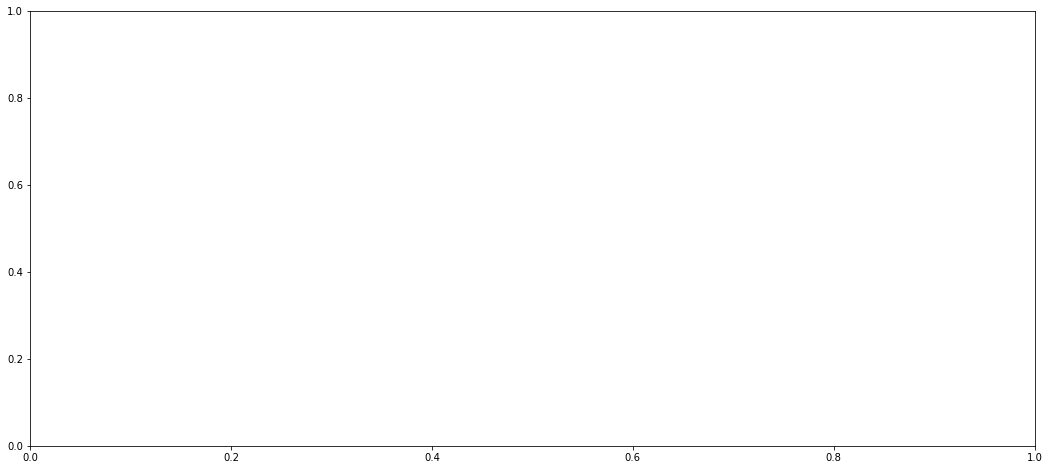

In [84]:
plt.figure(figsize = (18,8))
plt.plot(range(0), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(30), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [78]:
predictions = model.evaluate(x_test, y_test)
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

1112/1112 [==============================] - 3s 2ms/step
LOSS : 0.8344137668609619
ACCURACY : 0.5593525182000167
